In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

In [15]:
# Reading the data into panda Dataframe
df = pd.read_json("Brisbane_CityBike.json")
df.head()

,number,name,address,latitude,longitude
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046
2,88,88 - SYDNEY ST FERRY TERMINAL / PARK,Sydney St Ferry Terminal / Park,-27.474531,153.042728
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986
4,98,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696


In [16]:
# Checking the state of our data and analysing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     149 non-null    int64  
 1   name       149 non-null    object 
 2   address    149 non-null    object 
 3   latitude   149 non-null    float64
 4   longitude  149 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ KB


In [17]:
print(df.describe())

            number    latitude   longitude
count   149.000000  149.000000  149.000000
mean     83.194631  -27.471305  153.025083
std      94.320019    0.010892    0.015057
min       1.000000  -27.499963  152.990627
25%      40.000000  -27.478653  153.014760
50%      77.000000  -27.470110  153.026861
75%     114.000000  -27.464681  153.035533
max    1101.000000  -27.448074  153.053645


In [19]:
# the data seems to be clean ( no missing values and no NULL values)
# The feature "Name" is already composed of the rest of features of our data (location and number) 
# it will be more intersting if we make the clustering by only basing on the location of the stations ( latitude, longtitude)

In [20]:
#Extracting the coordinates of the location
coord = df.loc[:,['latitude','longitude']]

In [21]:
#Find the right number of clusters by performing kmeans
K = range(1,11)  
#kmeans from 1 to 10
KM = [kmeans(coord,k) for k in K] 
centroids = [cent for (cent,var) in KM]   # cluster centroids
#calculate Euclidian distance between the stations to measure similarity
Dk = [cdist(coord, cent, 'euclidean') for cent in centroids]

dist = [np.min(D,axis=1) for D in Dk]
avgWithinSS = [sum(d)/coord.shape[0] for d in dist]  

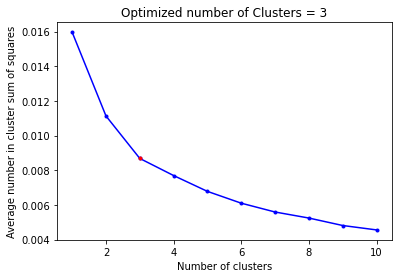

In [22]:

# plot curve to visualize the optimized number of cluster
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b.-')
ax.plot(K[2], avgWithinSS[2], 'r.')
plt.xlabel('Number of clusters')
plt.ylabel('Average number in cluster sum of squares')
plt.title(str('Optimized number of Clusters = ') + str(K[2]))  
plt.show()

In [27]:
#K-Means clustering
nb_cluster = 3   #number of clusters
kmeans = KMeans(n_clusters=nb_cluster, random_state=1).fit(coord)
label=kmeans.labels_

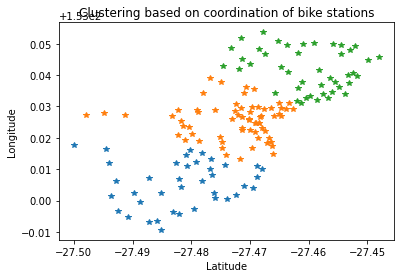

In [29]:
#visualization of the clustering results
plt.ylabel('Longitude')
plt.xlabel('Latitude')
for i in range(nb_cluster):
    cluster=np.where(label==i)[0]
    plt.plot(coord.latitude[cluster].values,coord.longitude[cluster].values,'*')
plt.title('Clustering based on coordination of bike stations')  
plt.show()